In [ ]:
# Instalar bibliotecas necessárias
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.9 MB/s eta 0:00:00


Upload do dataset e extração

In [ ]:
import zipfile
import os

# Caminho do arquivo zip carregado no Colab
zip_path = '/content/tom-jerry-object-detection.zip'

# Diretório de extração
extract_dir = '/content/tom_jerry_dataset'

# Extrair os arquivos
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Arquivos extraídos para: {extract_dir}")

# Visualizar estrutura do diretório
for root, dirs, files in os.walk(extract_dir):
    print(f"📁 {root}")
    for file in files:
        print(f"   📄 {file}")

Arquivos extraídos para: /content/tom_jerry_dataset
📁 /content/tom_jerry_dataset
   📄 starter_notebook.ipynb
   📄 sample_submission.csv
📁 /content/tom_jerry_dataset/Tom_and_Jerry_Kaggle_dataset
📁 /content/tom_jerry_dataset/Tom_and_Jerry_Kaggle_dataset/Tom_and_Jerry_Kaggle_dataset
📁 /content/tom_jerry_dataset/Tom_and_Jerry_Kaggle_dataset/Tom_and_Jerry_Kaggle_dataset/test
📁 /content/tom_jerry_dataset/Tom_and_Jerry_Kaggle_dataset/Tom_and_Jerry_Kaggle_dataset/test/images
   📄 e44c3417-frame800.jpg
   📄 5f3cd14f-TheMansionCat20017560.jpg
   📄 976c3615-AMouseintheHouse19475700.jpg
   📄 1d2f9cc6-frame4600.jpg
   📄 9384d998-DesignsOnJerry19554000.jpg
   📄 9e15862b-JerryJerryQuiteContrary19661500.jpg
   📄 ca3196b8-TheKarateGuard20051800.jpg
   📄 d03063a3-JerryJerryQuiteContrary19661260.jpg
   📄 cf997255-MouseCleaning19485700.jpg
   📄 b27d45a1-JerryJerryQuiteContrary19666840.jpg
   📄 036051d4-MouseCleaning19485100.jpg
   📄 4d7176f1-OnARoll20212160.jpg
   📄 2af69123-TheMansionCat20015280.jpg
   📄

Organizar o data set

In [ ]:
import os
import shutil

base_dir = '/content/tom_jerry_dataset'
inner_dir = os.path.join(base_dir, 'Tom_and_Jerry_Kaggle_dataset')
inner_inner_dir = os.path.join(inner_dir, 'Tom_and_Jerry_Kaggle_dataset')

# Verifica se a segunda pasta existe
if os.path.exists(inner_inner_dir):
    # Mover conteúdo da segunda pasta para a base_dir
    for item in os.listdir(inner_inner_dir):
        src = os.path.join(inner_inner_dir, item)
        dst = os.path.join(base_dir, item)
        # Se já existir, remova antes (com cuidado!)
        if os.path.exists(dst):
            if os.path.isdir(dst):
                shutil.rmtree(dst)
            else:
                os.remove(dst)
        shutil.move(src, dst)
    # Apagar as duas pastas internas
    os.rmdir(inner_inner_dir)
    os.rmdir(inner_dir)
    print("Conteúdo movido e pastas internas removidas com sucesso.")
else:
    print(f"A pasta '{inner_inner_dir}' não existe.")


Conteúdo movido e pastas internas removidas com sucesso.


Explorar o Arquivo

In [ ]:
import os

base_dir = '/content/tom_jerry_dataset'

for root, dirs, files in os.walk(base_dir):
    print(f"📁 Diretório: {root}")
    for d in dirs:
        print(f"   📂 Pasta: {d}")
    for f in files:
        print(f"   📄 Arquivo: {f}")


📁 Diretório: /content/tom_jerry_dataset
   📂 Pasta: test
   📂 Pasta: train
   📄 Arquivo: starter_notebook.ipynb
   📄 Arquivo: sample_submission.csv
📁 Diretório: /content/tom_jerry_dataset/test
   📂 Pasta: images
📁 Diretório: /content/tom_jerry_dataset/test/images
   📄 Arquivo: e44c3417-frame800.jpg
   📄 Arquivo: 5f3cd14f-TheMansionCat20017560.jpg
   📄 Arquivo: 976c3615-AMouseintheHouse19475700.jpg
   📄 Arquivo: 1d2f9cc6-frame4600.jpg
   📄 Arquivo: 9384d998-DesignsOnJerry19554000.jpg
   📄 Arquivo: 9e15862b-JerryJerryQuiteContrary19661500.jpg
   📄 Arquivo: ca3196b8-TheKarateGuard20051800.jpg
   📄 Arquivo: d03063a3-JerryJerryQuiteContrary19661260.jpg
   📄 Arquivo: cf997255-MouseCleaning19485700.jpg
   📄 Arquivo: b27d45a1-JerryJerryQuiteContrary19666840.jpg
   📄 Arquivo: 036051d4-MouseCleaning19485100.jpg
   📄 Arquivo: 4d7176f1-OnARoll20212160.jpg
   📄 Arquivo: 2af69123-TheMansionCat20015280.jpg
   📄 Arquivo: e1b5ecfe-AMouseintheHouse19477000.jpg
   📄 Arquivo: 4e1d78e4-AhSweetMouseStoryofL

Explorar o Arquivo train.json

In [ ]:
import json

# Caminho correto do arquivo JSON após reorganização
json_path = '/content/tom_jerry_dataset/train/annotations/train.json'

# Carregar e explorar o arquivo JSON
with open(json_path, 'r') as f:
    data = json.load(f)

# Visualizar as chaves principais do JSON
print("🔑 Chaves principais no JSON:", data.keys())

# Exibir as primeiras anotações
import json
print("📊 Exemplo de anotação:")
print(json.dumps(data['annotations'][:5], indent=2))



🔑 Chaves principais no JSON: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
📊 Exemplo de anotação:
[
  {
    "id": 1,
    "image_id": 1,
    "category_id": 0,
    "iscrowd": 0,
    "bbox": [
      294.0,
      90.0,
      230.0,
      223.0
    ],
    "area": 51290.0,
    "segmentation": []
  },
  {
    "id": 2,
    "image_id": 2,
    "category_id": 1,
    "iscrowd": 0,
    "bbox": [
      183.0,
      229.0,
      149.0,
      149.0
    ],
    "area": 22201.0,
    "segmentation": []
  },
  {
    "id": 3,
    "image_id": 2,
    "category_id": 0,
    "iscrowd": 0,
    "bbox": [
      312.0,
      0.0,
      326.0,
      454.0
    ],
    "area": 148004.0,
    "segmentation": []
  },
  {
    "id": 4,
    "image_id": 3,
    "category_id": 0,
    "iscrowd": 0,
    "bbox": [
      188.0,
      160.0,
      191.0,
      189.0
    ],
    "area": 36099.0,
    "segmentation": []
  },
  {
    "id": 5,
    "image_id": 4,
    "category_id": 1,
    "iscrowd": 0,
    "bbox": [

In [ ]:
import os

# Diretório base após reorganização
dataset_path = "/content/tom_jerry_dataset"

print("Conteúdo do diretório 'tom_jerry_dataset':", os.listdir(dataset_path))

# Caminho para 'train' e 'annotations'
train_path = os.path.join(dataset_path, "train")
print("Conteúdo do diretório 'train':", os.listdir(train_path))

annotations_path = os.path.join(train_path, "annotations")
print("Conteúdo do diretório 'annotations':", os.listdir(annotations_path))


Conteúdo do diretório 'tom_jerry_dataset': ['starter_notebook.ipynb', 'sample_submission.csv', 'test', 'train']
Conteúdo do diretório 'train': ['images', 'annotations']
Conteúdo do diretório 'annotations': ['train.json']


novo caminho

In [ ]:
import json

# Caminho atualizado após reorganização
annotations_path = "/content/tom_jerry_dataset/train/annotations/train.json"

# Carregar o JSON e visualizar as anotações
with open(annotations_path, 'r') as f:
    data = json.load(f)

# Visualizar as chaves principais
print("Chaves principais no JSON:", data.keys())

# Exibir as primeiras anotações (se houver)
print("Primeiras anotações:", data["annotations"][:5])


Chaves principais no JSON: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
Primeiras anotações: [{'id': 1, 'image_id': 1, 'category_id': 0, 'iscrowd': 0, 'bbox': [294.0, 90.0, 230.0, 223.0], 'area': 51290.0, 'segmentation': []}, {'id': 2, 'image_id': 2, 'category_id': 1, 'iscrowd': 0, 'bbox': [183.0, 229.0, 149.0, 149.0], 'area': 22201.0, 'segmentation': []}, {'id': 3, 'image_id': 2, 'category_id': 0, 'iscrowd': 0, 'bbox': [312.0, 0.0, 326.0, 454.0], 'area': 148004.0, 'segmentation': []}, {'id': 4, 'image_id': 3, 'category_id': 0, 'iscrowd': 0, 'bbox': [188.0, 160.0, 191.0, 189.0], 'area': 36099.0, 'segmentation': []}, {'id': 5, 'image_id': 4, 'category_id': 1, 'iscrowd': 0, 'bbox': [373.0, 226.0, 108.0, 106.0], 'area': 11448.0, 'segmentation': []}]


Carregar e Visualizar o JSON

In [ ]:
import json
import os

# Caminho correto do arquivo JSON após reorganização
annotations_path = "/content/tom_jerry_dataset/train/annotations/train.json"

# Carregar o JSON
with open(annotations_path, 'r') as f:
    data = json.load(f)

# Visualizar as chaves principais
print("Chaves principais no JSON:", data.keys())

# Exibir as primeiras anotações (se existirem)
if "annotations" in data:
    print("Primeiras 5 anotações:", data["annotations"][:5])
else:
    print("A chave 'annotations' não foi encontrada no JSON.")


Chaves principais no JSON: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
Primeiras 5 anotações: [{'id': 1, 'image_id': 1, 'category_id': 0, 'iscrowd': 0, 'bbox': [294.0, 90.0, 230.0, 223.0], 'area': 51290.0, 'segmentation': []}, {'id': 2, 'image_id': 2, 'category_id': 1, 'iscrowd': 0, 'bbox': [183.0, 229.0, 149.0, 149.0], 'area': 22201.0, 'segmentation': []}, {'id': 3, 'image_id': 2, 'category_id': 0, 'iscrowd': 0, 'bbox': [312.0, 0.0, 326.0, 454.0], 'area': 148004.0, 'segmentation': []}, {'id': 4, 'image_id': 3, 'category_id': 0, 'iscrowd': 0, 'bbox': [188.0, 160.0, 191.0, 189.0], 'area': 36099.0, 'segmentation': []}, {'id': 5, 'image_id': 4, 'category_id': 1, 'iscrowd': 0, 'bbox': [373.0, 226.0, 108.0, 106.0], 'area': 11448.0, 'segmentation': []}]


Conversão para Formato YOLO

In [ ]:
import os

# Função para converter bbox para formato YOLO
def convert_to_yolo(annotation, img_width, img_height):
    x_min, y_min, width, height = annotation['bbox']
    x_center = x_min + width / 2
    y_center = y_min + height / 2

    # Normalizar para [0, 1]
    x_center /= img_width
    y_center /= img_height
    width /= img_width
    height /= img_height

    return [annotation['category_id'], x_center, y_center, width, height]

# Diretório para salvar as anotações convertidas (ajuste conforme a sua estrutura atual)
output_dir = "/content/tom_jerry_dataset/labels"
os.makedirs(output_dir, exist_ok=True)

# Criar mapeamento de category_id do JSON para índices sequenciais (0,1,...)
category_id_to_index = {}
for idx, cat in enumerate(data['categories']):
    category_id_to_index[cat['id']] = idx

# Processar anotações e salvar arquivos de label no formato YOLO
for img in data['images']:
    img_id = img['id']
    img_width = img['width']
    img_height = img['height']

    # Nome do arquivo de rótulo (mesmo nome da imagem, mas com extensão .txt)
    label_file = os.path.join(output_dir, f"{os.path.splitext(img['file_name'])[0]}.txt")

    with open(label_file, 'w') as f:
        # Anotações dessa imagem
        anns = [ann for ann in data['annotations'] if ann['image_id'] == img_id]

        for ann in anns:
            # Converter categoria para índice sequencial
            cat_idx = category_id_to_index[ann['category_id']]

            # Converter bbox
            x_min, y_min, w, h = ann['bbox']
            x_center = x_min + w / 2
            y_center = y_min + h / 2

            # Normalizar
            x_center /= img_width
            y_center /= img_height
            w /= img_width
            h /= img_height

            # Escrever no formato YOLO: <class> <x_center> <y_center> <width> <height>
            f.write(f"{cat_idx} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")

print(f"Conversão para formato YOLO concluída. Anotações salvas em: {output_dir}")


Conversão para formato YOLO concluída. Anotações salvas em: /content/tom_jerry_dataset/labels


Verificar Arquivos Convertidos

In [ ]:
import os
import shutil

base_dir = "/content/tom_jerry_dataset"
general_labels_dir = os.path.join(base_dir, "labels")

train_images_dir = os.path.join(base_dir, "train/images")
test_images_dir = os.path.join(base_dir, "test/images")

train_labels_dir = os.path.join(base_dir, "train/labels")
test_labels_dir = os.path.join(base_dir, "test/labels")

# Criar pastas se não existirem
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)

# Listar imagens de treino e teste (sem extensão)
train_images = [f.split('.')[0] for f in os.listdir(train_images_dir)]
test_images = [f.split('.')[0] for f in os.listdir(test_images_dir)]

# Copiar labels para treino
for img_name in train_images:
    src = os.path.join(general_labels_dir, img_name + ".txt")
    dst = os.path.join(train_labels_dir, img_name + ".txt")
    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"Label não encontrado para imagem de treino: {img_name}")

# Copiar labels para teste
for img_name in test_images:
    src = os.path.join(general_labels_dir, img_name + ".txt")
    dst = os.path.join(test_labels_dir, img_name + ".txt")
    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"Label não encontrado para imagem de teste: {img_name}")

print("Cópia dos arquivos de label concluída.")




Label não encontrado para imagem de teste: e44c3417-frame800
Label não encontrado para imagem de teste: 5f3cd14f-TheMansionCat20017560
Label não encontrado para imagem de teste: 976c3615-AMouseintheHouse19475700
Label não encontrado para imagem de teste: 1d2f9cc6-frame4600
Label não encontrado para imagem de teste: 9384d998-DesignsOnJerry19554000
Label não encontrado para imagem de teste: 9e15862b-JerryJerryQuiteContrary19661500
Label não encontrado para imagem de teste: ca3196b8-TheKarateGuard20051800
Label não encontrado para imagem de teste: d03063a3-JerryJerryQuiteContrary19661260
Label não encontrado para imagem de teste: cf997255-MouseCleaning19485700
Label não encontrado para imagem de teste: b27d45a1-JerryJerryQuiteContrary19666840
Label não encontrado para imagem de teste: 036051d4-MouseCleaning19485100
Label não encontrado para imagem de teste: 4d7176f1-OnARoll20212160
Label não encontrado para imagem de teste: 2af69123-TheMansionCat20015280
Label não encontrado para imagem d

In [ ]:
import os

general_labels_dir = "/content/tom_jerry_dataset/labels"
test_images_dir = "/content/tom_jerry_dataset/test/images"

# Listar arquivos de labels
labels_files = [f.split('.')[0] for f in os.listdir(general_labels_dir) if f.endswith('.txt')]

# Listar imagens de teste
test_images = [f.split('.')[0] for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.png'))]

# Imagens de teste sem labels
test_without_labels = [img for img in test_images if img not in labels_files]

print(f"Imagens de teste sem labels: {len(test_without_labels)}")
print(test_without_labels[:10])  # Mostrar até 10 nomes


Imagens de teste sem labels: 180
['e44c3417-frame800', '5f3cd14f-TheMansionCat20017560', '976c3615-AMouseintheHouse19475700', '1d2f9cc6-frame4600', '9384d998-DesignsOnJerry19554000', '9e15862b-JerryJerryQuiteContrary19661500', 'ca3196b8-TheKarateGuard20051800', 'd03063a3-JerryJerryQuiteContrary19661260', 'cf997255-MouseCleaning19485700', 'b27d45a1-JerryJerryQuiteContrary19666840']


Identificar e Resolver Discrepâncias

In [ ]:
import os

# Diretórios das imagens e rótulos
images_dir = "/content/tom_jerry_dataset/train/images"
labels_dir = "/content/tom_jerry_dataset/train/labels"

# Listar arquivos de imagens e rótulos (sem extensão)
image_files = [f.split('.')[0] for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
label_files = [f.split('.')[0] for f in os.listdir(labels_dir) if f.endswith('.txt')]

# Identificar discrepâncias
missing_labels = [img for img in image_files if img not in label_files]
extra_labels = [lbl for lbl in label_files if lbl not in image_files]

print(f"Total de imagens sem rótulos: {len(missing_labels)}")
print(f"Total de rótulos sem imagens: {len(extra_labels)}")

# Remover rótulos sem imagens correspondentes
for lbl in extra_labels:
    label_path = os.path.join(labels_dir, f"{lbl}.txt")
    if os.path.exists(label_path):
        os.remove(label_path)
        print(f"Rótulo removido: {label_path}")

# Remover imagens sem rótulos correspondentes
for img in missing_labels:
    image_path = os.path.join(images_dir, f"{img}.jpg")  # Ajuste a extensão, se necessário
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Imagem removida: {image_path}")


print("\nResumo:")
print(f"Imagens sem rótulos removidas: {len(missing_labels)}")
print(f"Rótulos sem imagens removidos: {len(extra_labels)}")



Total de imagens sem rótulos: 0
Total de rótulos sem imagens: 0

Resumo:
Imagens sem rótulos removidas: 0
Rótulos sem imagens removidos: 0


Identificar imagens com rotulo

Imagens com Rótulos: 727 imagens


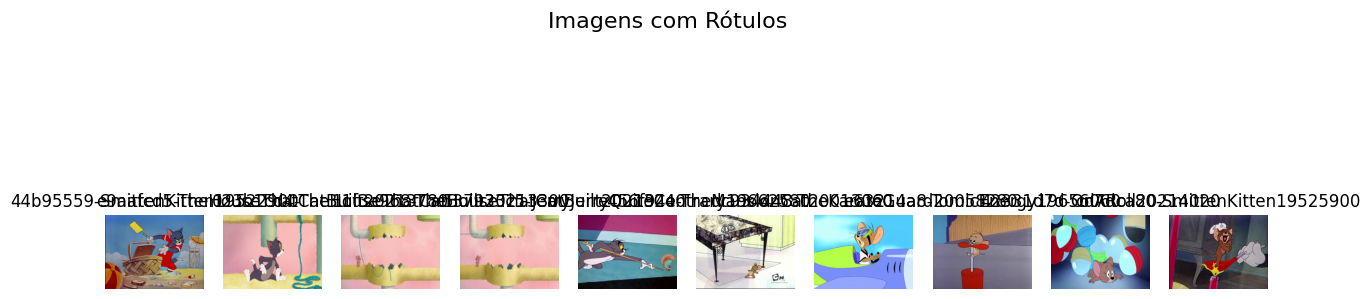

Imagens sem Rótulos: 0 imagens
Nenhuma imagem encontrada para imagens sem rótulos.



In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Diretórios das imagens e rótulos
images_dir = "/content/tom_jerry_dataset/train/images"
labels_dir = "/content/tom_jerry_dataset/train/labels"

# Listar arquivos de imagens e rótulos (sem extensão)
image_files = [f.split('.')[0] for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
label_files = [f.split('.')[0] for f in os.listdir(labels_dir) if f.endswith('.txt')]

# Identificar imagens com e sem rótulos
images_with_labels = [img for img in image_files if img in label_files]
images_without_labels = [img for img in image_files if img not in label_files]

# Função para exibir imagens
def display_images(image_names, title, images_dir, max_images=10):
    print(f"{title}: {len(image_names)} imagens")
    if not image_names:
        print(f"Nenhuma imagem encontrada para {title.lower()}.\n")
        return

    # Exibir no máximo `max_images`
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(image_names[:max_images]):
        img_path = os.path.join(images_dir, f"{img_name}.jpg")  # Ajuste a extensão se necessário
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.subplot(1, min(len(image_names), max_images), i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(img_name)
    plt.suptitle(title, fontsize=16)
    plt.show()

# Exibir imagens com rótulos
display_images(images_with_labels, "Imagens com Rótulos", images_dir)

# Exibir imagens sem rótulos
display_images(images_without_labels, "Imagens sem Rótulos", images_dir)


carregar e extrair as informações dele para converter as anotações para o formato YOLO

In [ ]:
import json
import os

# Novo caminho do JSON após reorganização
json_path = "/content/tom_jerry_dataset/train/annotations/train.json"

# Novo diretório onde os labels serão salvos
labels_output_dir = "/content/tom_jerry_dataset/train/labels"

# Criar o diretório de saída se ele não existir
os.makedirs(labels_output_dir, exist_ok=True)

# Carregar JSON
with open(json_path, 'r') as f:
    data = json.load(f)

print(f"Número de imagens: {len(data['images'])}")
print(f"Número de categorias: {len(data['categories'])}")
print(f"Número de anotações: {len(data['annotations'])}")

# Criar um dicionário para mapear image_id para filename
image_id_to_filename = {img['id']: img['file_name'] for img in data['images']}

# Criar um dicionário para mapear category_id para um índice do YOLO (0, 1, 2...)
category_id_to_yolo_id = {cat['id']: idx for idx, cat in enumerate(data['categories'])}

# Função para converter bbox COCO (x,y,w,h) para YOLO (x_center, y_center, width, height) normalizados
def convert_bbox(size, bbox):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = bbox[0] + bbox[2] / 2.0
    y = bbox[1] + bbox[3] / 2.0
    w = bbox[2]
    h = bbox[3]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

# Carregar dimensões da imagem e salvar os labels
for annotation in data['annotations']:
    image_id = annotation['image_id']
    category_id = annotation['category_id']
    bbox = annotation['bbox']

    filename = image_id_to_filename[image_id]
    label_file = os.path.splitext(filename)[0] + ".txt"
    label_path = os.path.join(labels_output_dir, label_file)

    # Pegando a largura e altura da imagem
    image_info = next(img for img in data['images'] if img['id'] == image_id)
    width = image_info['width']
    height = image_info['height']

    x_center, y_center, w, h = convert_bbox((width, height), bbox)
    yolo_class_id = category_id_to_yolo_id[category_id]

    # Escreve no arquivo (append para múltiplas anotações por imagem)
    with open(label_path, "a") as f:
        f.write(f"{yolo_class_id} {x_center} {y_center} {w} {h}\n")

print("Conversão finalizada! Os arquivos de label foram criados na pasta 'labels'.")


Número de imagens: 727
Número de categorias: 2
Número de anotações: 909
Conversão finalizada! Os arquivos de label foram criados na pasta 'labels'.


visualizar algumas imagens do treino com as caixas delimitadoras desenhadas

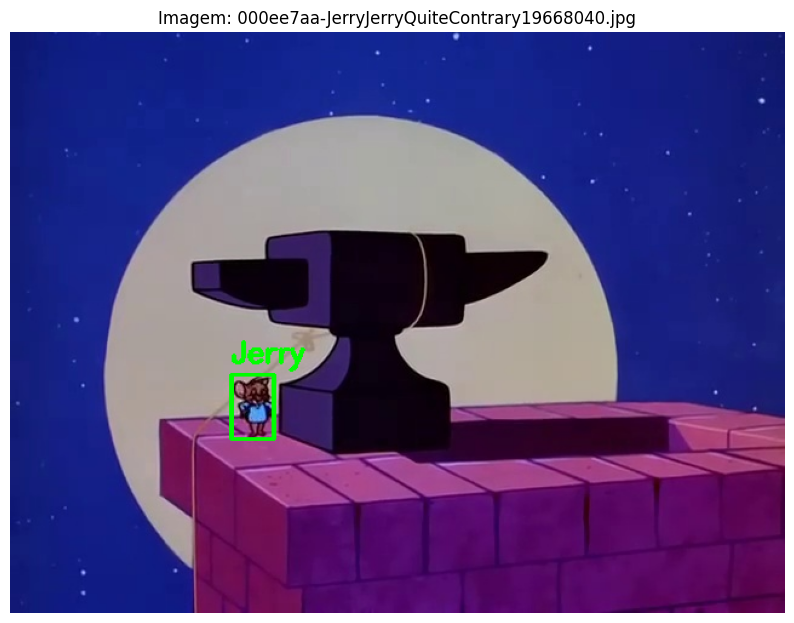

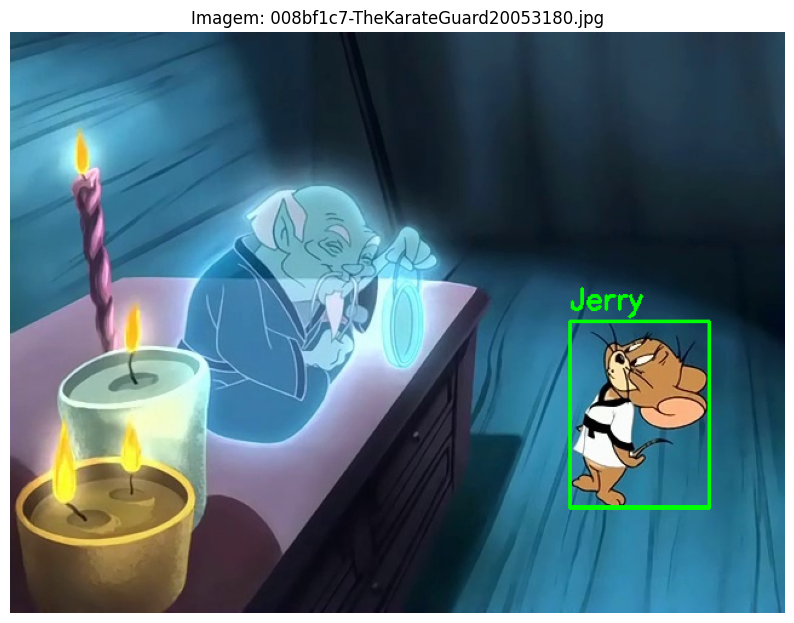

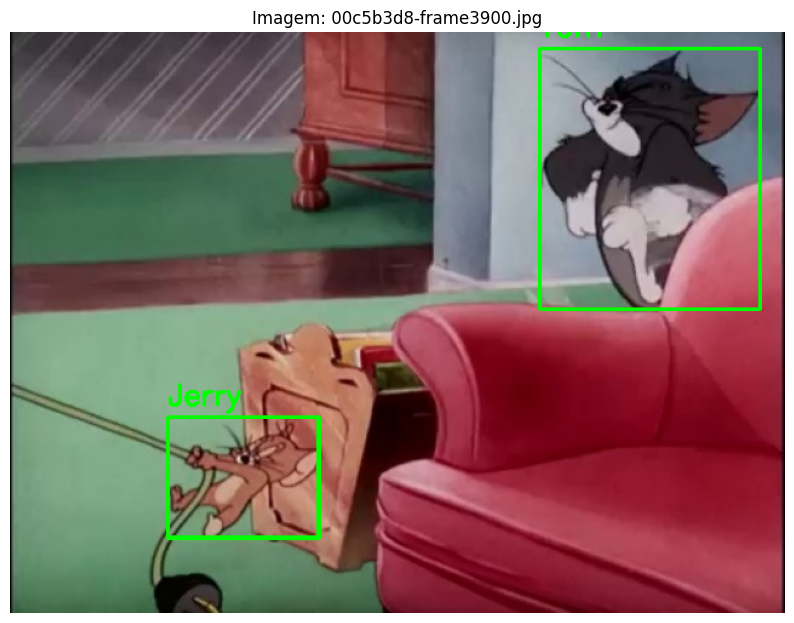

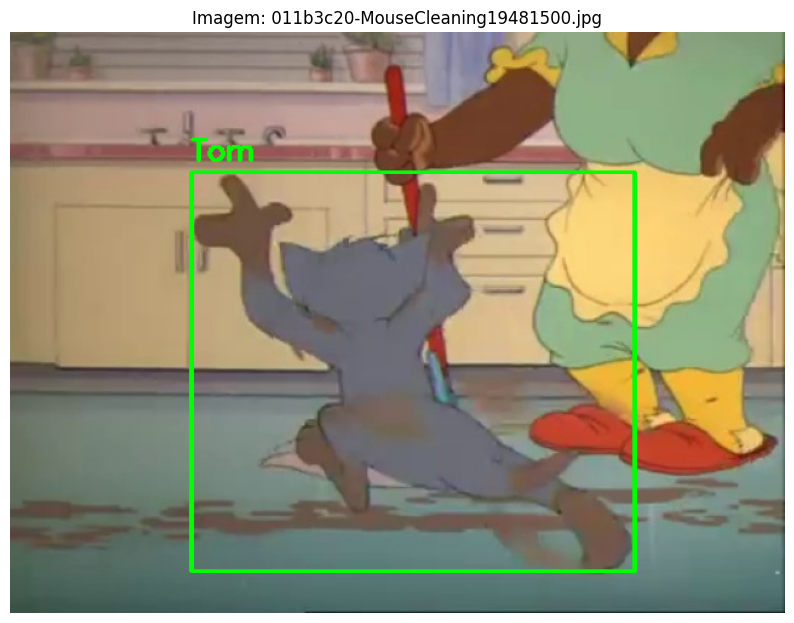

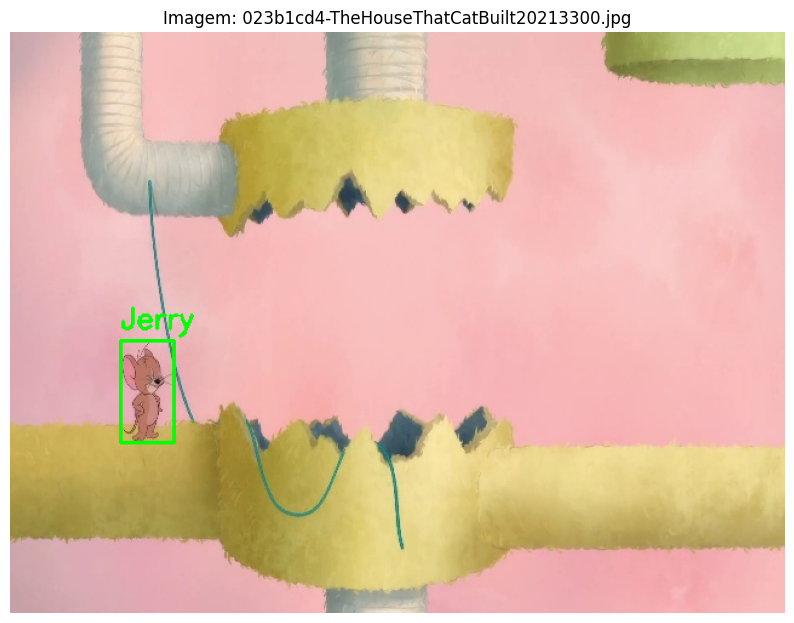

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Diretórios das imagens e dos rótulos convertidos
images_dir = "/content/tom_jerry_dataset/train/images"
labels_dir = "/content/tom_jerry_dataset/train/labels"

# Dicionário das classes (conforme seu dataset)
classes = {0: 'Tom', 1: 'Jerry'}

def draw_bbox(img, x_center, y_center, width, height, label, color=(0, 255, 0)):
    h, w, _ = img.shape
    x_center, y_center, width, height = float(x_center), float(y_center), float(width), float(height)
    box_w = int(width * w)
    box_h = int(height * h)
    x1 = int(x_center * w - box_w / 2)
    y1 = int(y_center * h - box_h / 2)
    x2 = x1 + box_w
    y2 = y1 + box_h
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

# Mostrar as primeiras 5 imagens com anotações
n = 5
image_files = sorted(os.listdir(images_dir))[:n]

for img_file in image_files:
    img_path = os.path.join(images_dir, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    label_file = img_file.replace('.jpg', '.txt')  # Ajuste a extensão da imagem, se necessário
    label_path = os.path.join(labels_dir, label_file)

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                cls, x_c, y_c, w, h = line.strip().split()
                label = classes[int(cls)]
                draw_bbox(img, x_c, y_c, w, h, label)
    else:
        print(f"Label não encontrado para a imagem: {img_file}")

    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title(f"Imagem: {img_file}")
    plt.axis('off')
    plt.show()


criar o arquivo YAML necessário para configurar o treinamento do YOLO

In [ ]:
# Dados para o arquivo YAML
yaml_content = """
path: /content/tom_jerry_dataset
train: train/images
val: test/images
nc: 2
names: ['Tom', 'Jerry']
"""

# Caminho para salvar o arquivo YAML
yaml_path = "/content/tom_jerry_dataset/tom_jerry.yaml"

# Criar o arquivo YAML
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"Arquivo YAML criado com sucesso em: {yaml_path}")


Arquivo YAML criado com sucesso em: /content/tom_jerry_dataset/tom_jerry.yaml


verificar a correspondência entre imagens e rótulo

In [ ]:
import os

# Diretórios das imagens e dos rótulos
images_dir = "/content/tom_jerry_dataset/train/images"
labels_dir = "/content/tom_jerry_dataset/train/labels"

# Pega os nomes dos arquivos de imagem (sem extensão)
image_files = [os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Pega os nomes dos arquivos de label (sem extensão)
label_files = [os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.lower().endswith('.txt')]

# Imagens que não possuem rótulo correspondente
images_without_labels = [img for img in image_files if img not in label_files]

# Rótulos que não possuem imagem correspondente
labels_without_images = [lbl for lbl in label_files if lbl not in image_files]

print(f"Imagens sem rótulos correspondentes: {len(images_without_labels)}")
print(f"Rótulos sem imagens correspondentes: {len(labels_without_images)}")

if images_without_labels:
    print("Arquivos de imagem sem label:")
    for img in images_without_labels:
        print(f"  {img}")

if labels_without_images:
    print("Arquivos de label sem imagem:")
    for lbl in labels_without_images:
        print(f"  {lbl}")


Imagens sem rótulos correspondentes: 0
Rótulos sem imagens correspondentes: 0


Verificação do arquivo YAML está configurado corretamente para treinar um modelo YOLO

In [ ]:
import yaml
import os

yaml_path = '/content/tom_jerry_dataset/tom_jerry.yaml'

with open(yaml_path) as f:
    config = yaml.safe_load(f)

# Verificar as chaves principais
required_keys = ['path', 'train', 'val', 'nc', 'names']
for key in required_keys:
    if key not in config:
        print(f"Erro: chave '{key}' não encontrada no arquivo YAML.")
    else:
        print(f"Chave '{key}' encontrada.")

# Verificar se os diretórios existem
base_path = config.get('path')
train_dir = os.path.join(base_path, config.get('train', ''))
val_dir = os.path.join(base_path, config.get('val', ''))

print(f"\nVerificando existência dos diretórios:")

if os.path.exists(train_dir):
    print(f"Diretório de treino existe: {train_dir}")
else:
    print(f"Diretório de treino NÃO encontrado: {train_dir}")

if os.path.exists(val_dir):
    print(f"Diretório de validação existe: {val_dir}")
else:
    print(f"Diretório de validação NÃO encontrado: {val_dir}")

# Verificar se nc e names são consistentes
nc = config.get('nc')
names = config.get('names')

if nc != len(names):
    print(f"Aviso: 'nc' ({nc}) não coincide com o número de classes em 'names' ({len(names)}).")
else:
    print("Número de classes ('nc') e nomes ('names') estão consistentes.")


Chave 'path' encontrada.
Chave 'train' encontrada.
Chave 'val' encontrada.
Chave 'nc' encontrada.
Chave 'names' encontrada.

Verificando existência dos diretórios:
Diretório de treino existe: /content/tom_jerry_dataset/train/images
Diretório de validação existe: /content/tom_jerry_dataset/test/images
Número de classes ('nc') e nomes ('names') estão consistentes.


imagens com bounding boxes

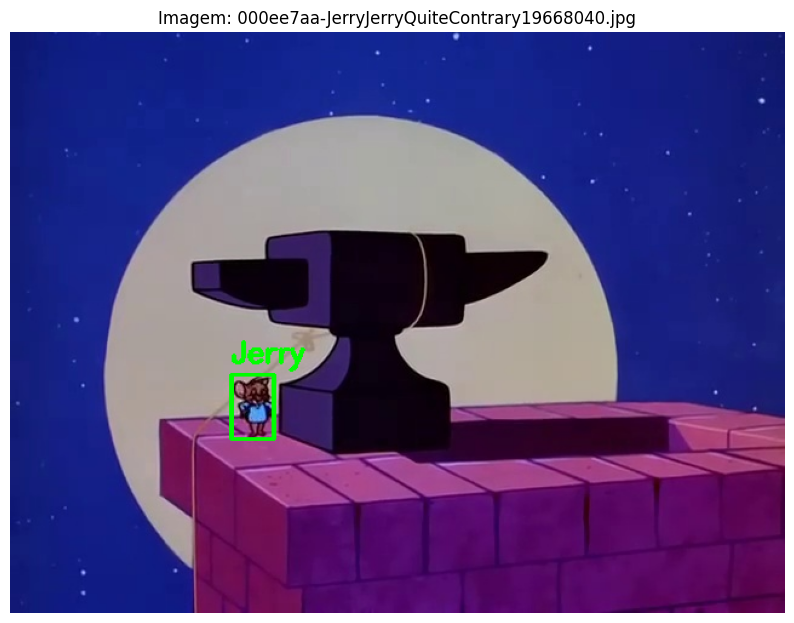

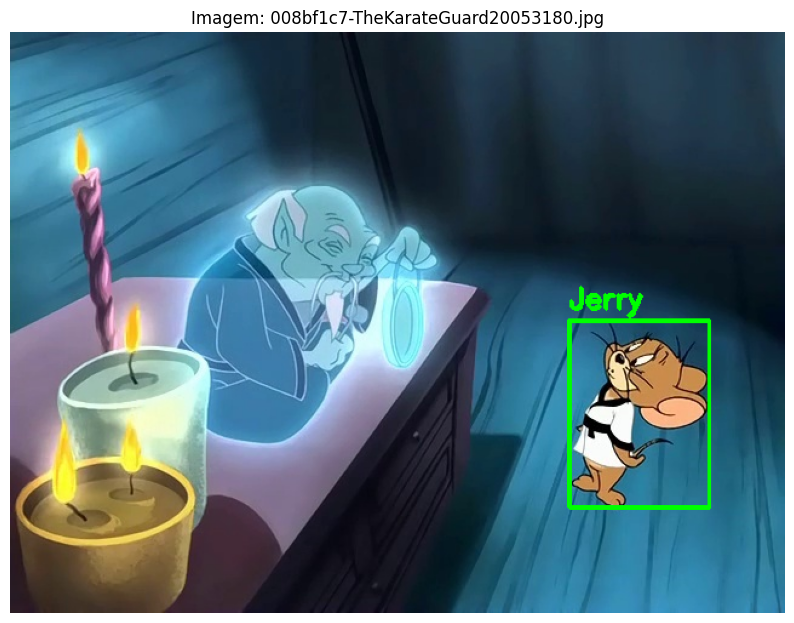

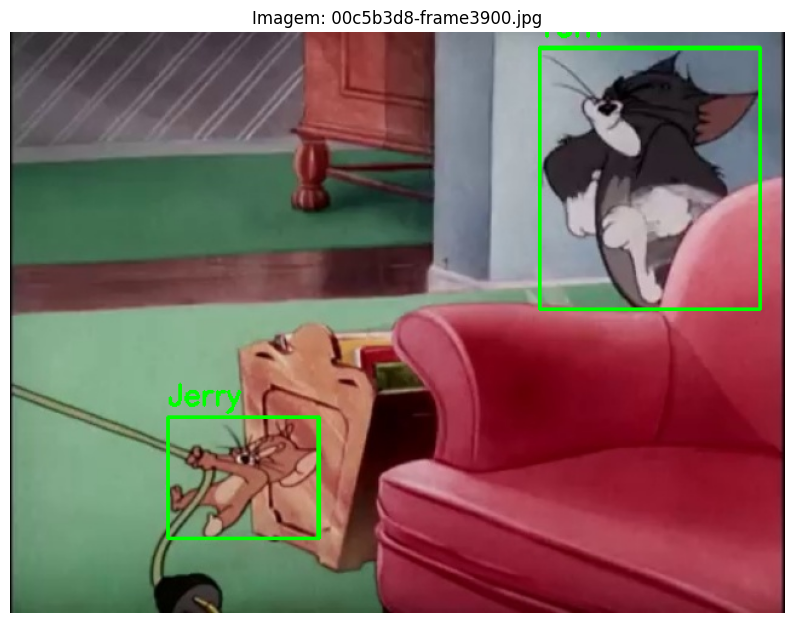

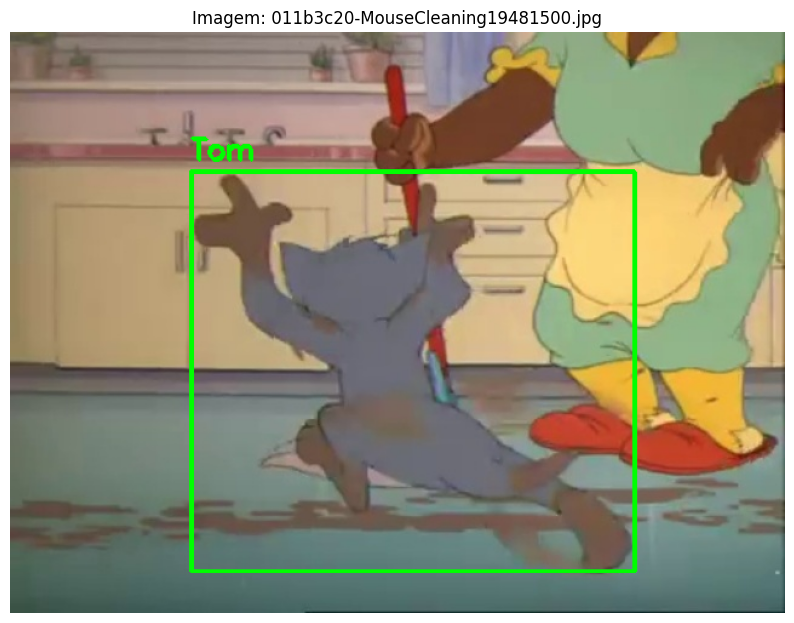

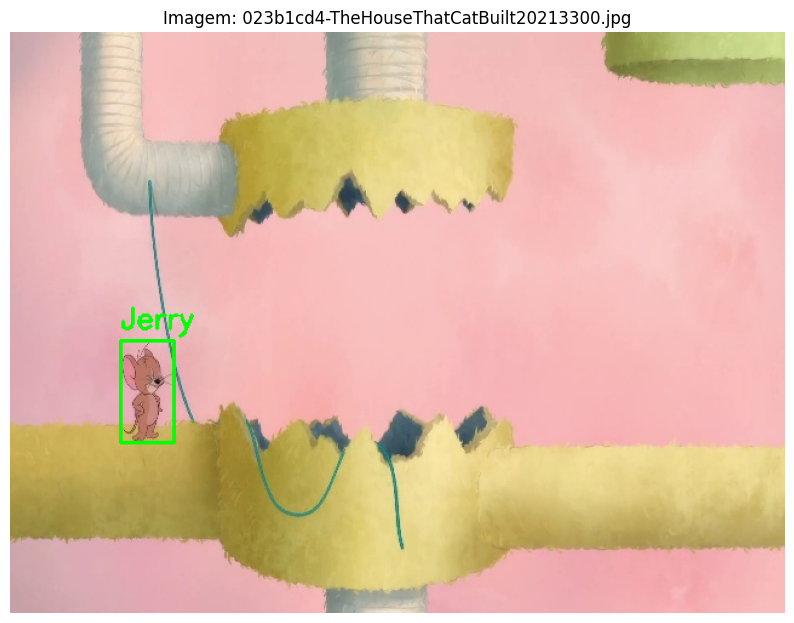

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Diretórios
images_dir = "/content/tom_jerry_dataset/train/images"
labels_dir = "/content/tom_jerry_dataset/train/labels"

# Dicionário das classes
classes = {0: 'Tom', 1: 'Jerry'}

def draw_bbox(img, x_c, y_c, w, h, label, color=(0, 255, 0)):
    height, width, _ = img.shape

    # Converter bbox YOLO para coordenadas da caixa
    x_center = x_c * width
    y_center = y_c * height
    box_w = w * width
    box_h = h * height

    x1 = int(x_center - box_w / 2)
    y1 = int(y_center - box_h / 2)
    x2 = int(x_center + box_w / 2)
    y2 = int(y_center + box_h / 2)

    # Desenhar retângulo
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    # Escrever a label
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

# Escolha quantas imagens quer ver
num_images = 5

# Pegar as primeiras imagens da pasta
image_files = sorted(os.listdir(images_dir))[:num_images]

for img_file in image_files:
    img_path = os.path.join(images_dir, img_file)
    label_path = os.path.join(labels_dir, img_file.replace('.jpg', '.txt'))  # ajuste extensão se diferente

    # Ler imagem
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                cls, x_c, y_c, w, h = line.strip().split()
                label = classes.get(int(cls), 'Unknown')
                draw_bbox(img, float(x_c), float(y_c), float(w), float(h), label)
    else:
        print(f"Label não encontrado para: {img_file}")

    plt.figure(figsize=(10,8))
    plt.imshow(img)
    plt.title(f"Imagem: {img_file}")
    plt.axis('off')
    plt.show()


imagens no conjunto de treino que não têm arquivos de rótulos

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Diretórios das imagens e dos rótulos
images_dir = "/content/tom_jerry_dataset/train/images"  # Atualize para o caminho correto
labels_dir = "/content/tom_jerry_dataset/train/labels"  # Atualize para o caminho correto

# Verificar se os diretórios existem
if not os.path.exists(images_dir):
    raise FileNotFoundError(f"O diretório {images_dir} não existe.")
if not os.path.exists(labels_dir):
    raise FileNotFoundError(f"O diretório {labels_dir} não existe.")

# Listar arquivos de imagens (sem extensão)
image_files = [f.split('.')[0] for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
# Listar arquivos de rótulos (sem extensão)
label_files = [f.split('.')[0] for f in os.listdir(labels_dir) if f.endswith('.txt')]

# Imagens sem rótulos
images_without_labels = [img for img in image_files if img not in label_files]

print(f"Total de imagens sem rótulos: {len(images_without_labels)}")

# Função para mostrar imagens
def display_images(image_names, title, images_dir, max_images=10):
    print(f"{title}: {len(image_names)} imagens")
    if not image_names:
        print(f"Nenhuma imagem encontrada para {title.lower()}.\n")
        return

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(image_names[:max_images]):
        img_path = os.path.join(images_dir, f"{img_name}.jpg")  # Ajuste extensão se necessário
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.subplot(1, min(len(image_names), max_images), i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(img_name)
    plt.suptitle(title, fontsize=16)
    plt.show()

# Mostrar imagens sem rótulos
display_images(images_without_labels, "Imagens Sem Rótulos", images_dir)



Total de imagens sem rótulos: 0
Imagens Sem Rótulos: 0 imagens
Nenhuma imagem encontrada para imagens sem rótulos.



dataset de treino em 90% para treino e 10% para validação

In [ ]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Diretórios originais com imagens e labels
images_dir = "/content/tom_jerry_dataset/train/images"
labels_dir = "/content/tom_jerry_dataset/train/labels"

# Novos diretórios para treino e validação
train_images_dir = "/content/tom_jerry_dataset/train_split/images"
val_images_dir = "/content/tom_jerry_dataset/val_split/images"

train_labels_dir = "/content/tom_jerry_dataset/train_split/labels"
val_labels_dir = "/content/tom_jerry_dataset/val_split/labels"

# Criar diretórios caso não existam
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Listar todas as imagens (com extensão)
image_files = [f for f in os.listdir(images_dir) if f.endswith((".jpg", ".png"))]

# Dividir em 80% treino e 20% validação
train_files, val_files = train_test_split(image_files, test_size=0.1, random_state=42)

# Copiar arquivos para as pastas de treino
for f in train_files:
    shutil.copy(os.path.join(images_dir, f), train_images_dir)
    label_file = f.rsplit('.', 1)[0] + ".txt"  # trocar extensão para .txt
    src_label_path = os.path.join(labels_dir, label_file)
    dst_label_path = os.path.join(train_labels_dir, label_file)
    if os.path.exists(src_label_path):
        shutil.copy(src_label_path, dst_label_path)

# Copiar arquivos para as pastas de validação
for f in val_files:
    shutil.copy(os.path.join(images_dir, f), val_images_dir)
    label_file = f.rsplit('.', 1)[0] + ".txt"  # trocar extensão para .txt
    src_label_path = os.path.join(labels_dir, label_file)
    dst_label_path = os.path.join(val_labels_dir, label_file)
    if os.path.exists(src_label_path):
        shutil.copy(src_label_path, dst_label_path)

print(f"Divisão concluída: {len(train_files)} imagens para treino e {len(val_files)} para validação.")



Divisão concluída: 654 imagens para treino e 73 para validação.


 YAML com os caminhos corretos

In [ ]:
import yaml

# Caminhos atualizados
train_dir = "/content/tom_jerry_dataset/train_split/images"
val_dir = "/content/tom_jerry_dataset/val_split/images"

# Definir configurações do YAML
data = {
    "train": train_dir,
    "val": val_dir,
    "nc": 2,  # Número de classes
    "names": ["Tom", "Jerry"],  # Nomes das classes
}

# Caminho para salvar o arquivo YAML
yaml_path = "/content/tom_jerry_dataset/tom_jerry.yaml"

# Criar arquivo YAML
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print(f"Arquivo YAML atualizado e salvo em: {yaml_path}")


Arquivo YAML atualizado e salvo em: /content/tom_jerry_dataset/tom_jerry.yaml


Verificar a Estrutura das Pastas

In [ ]:
import os

train_images = os.listdir("/content/tom_jerry_dataset/train_split/images")
train_labels = os.listdir("/content/tom_jerry_dataset/train_split/labels")
val_images = os.listdir("/content/tom_jerry_dataset/val_split/images")
val_labels = os.listdir("/content/tom_jerry_dataset/val_split/labels")

print(f"Imagens de treino: {len(train_images)}")
print(f"Rótulos de treino: {len(train_labels)}")
print(f"Imagens de validação: {len(val_images)}")
print(f"Rótulos de validação: {len(val_labels)}")


Imagens de treino: 654
Rótulos de treino: 654
Imagens de validação: 73
Rótulos de validação: 73


Treinar o Modelo

In [ ]:
from ultralytics import YOLO

# Carregar o modelo YOLO
model = YOLO('yolov8n.pt')  # Você pode trocar por outros modelos YOLOv8, como yolov8s.pt ou yolov8m.pt

# Treinar o modelo
model.train(data="/content/tom_jerry_dataset/tom_jerry.yaml", epochs=50, imgsz=640, batch=16, name="tom_jerry_model")



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.2MB/s]


Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tom_jerry_dataset/tom_jerry.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tom_jerry_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751702  ultralytics.nn.modules.head.Detect           [2, [64, 128, 256]]           
Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1494.1±550.0 MB/s, size: 49.6 KB)


train: Scanning /content/tom_jerry_dataset/train_split/labels... 654 images, 0 backgrounds, 0 corrupt: 100%|██████████| 654/654 [00:00<00:00, 2036.96it/s]

train: /content/tom_jerry_dataset/train_split/images/067c50e2-JerryJerryQuiteContrary19665820.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/train_split/images/09c7f401-TheHouseThatCatBuilt20211020.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/train_split/images/2e4f52be-AMouseintheHouse19477900.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/train_split/images/47bee46f-TheHouseThatCatBuilt20212880.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/train_split/images/5501dc08-TheKarateGuard20053720.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/train_split/images/625d85b8-TheKarateGuard20052880.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/train_split/images/6e28f6f4-TheKarateGuard20056300.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/train_split/images/6fe8b1b0-MouseCleaning19481800.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/train_sp

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1138.0±435.2 MB/s, size: 56.1 KB)


val: Scanning /content/tom_jerry_dataset/val_split/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 2049.77it/s]

val: /content/tom_jerry_dataset/val_split/images/cf4b999e-TomicEnergy19654800.jpg: 1 duplicate labels removed
val: New cache created: /content/tom_jerry_dataset/val_split/labels.cache
Plotting labels to runs/detect/tom_jerry_model/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/tom_jerry_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.199       3.01      1.434         95        640:  34%|███▍      | 14/41 [03:15<06:16, 13.94s/it]


KeyboardInterrupt: 

Validar o Modelo

In [ ]:
results = model.val(data="/content/tom_jerry_dataset/tom_jerry.yaml")


Slvar as metricas

In [ ]:
import pandas as pd

metrics = {
    "class": [],
    "precision": [],
    "recall": [],
    "mAP50": [],
    "mAP50-95": []
}

for i, cls_name in results.names.items():
    metrics["class"].append(cls_name)
    metrics["precision"].append(results.box.p[i])     # Precision por classe
    metrics["recall"].append(results.box.r[i])        # Recall por classe
    metrics["mAP50"].append(results.box.ap50[i])      # mAP50 por classe (array, não método)
    metrics["mAP50-95"].append(results.box.ap[i])     # mAP50-95 por classe (array, não método)

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

df_metrics.to_csv("validation_metrics.csv", index=False)
print("Métricas salvas no arquivo validation_metrics.csv")


Os resultados do treinamento

In [ ]:
import os

print("Arquivos na pasta atual:", os.listdir())


baixar esse arquivo para o seu computador

In [ ]:
from google.colab import files
files.download('validation_metrics.csv')

In [ ]:
import shutil
from google.colab import files
import os

# Lista dos arquivos e pastas que você quer compactar
paths_to_zip = [
    'tom_jerry_dataset',
    'runs/detect/tom_jerry_model',
    'runs/detect/tom_jerry_model2',
    'runs/detect/tom_jerry_model3',
    'validation_metrics.csv',
    'classification_metrics.csv',
    'yolov8n.pt'
]

zip_filename = 'meus_arquivos_tom_jerry.zip'

# Compactar
shutil.make_archive(zip_filename.replace('.zip',''), 'zip', root_dir='.', base_dir='.')

# Esse shutil.make_archive com root_dir='.' e base_dir='.' faz zip de tudo na pasta raiz, então vamos criar um zip customizado:

# Para criar zip só dos arquivos e pastas listados:
import zipfile

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for path in paths_to_zip:
        if os.path.exists(path):
            if os.path.isfile(path):
                zipf.write(path)
            else:
                # Para pastas, adiciona recursivamente
                for root, dirs, files in os.walk(path):
                    for file in files:
                        full_path = os.path.join(root, file)
                        zipf.write(full_path)

print(f'Arquivo {zip_filename} criado!')

# Baixar arquivo zip
files.download(zip_filename)


Extrair métricas do YOLO e salvar num CSV

In [ ]:
# Considerando precisão e recall médias para um cálculo simplificado
precision_mean = sum(metrics["precision"]) / len(metrics["precision"])
recall_mean = sum(metrics["recall"]) / len(metrics["recall"])

accuracy_approx = 2 * (precision_mean * recall_mean) / (precision_mean + recall_mean)  # F1-score aproximado

print(f"Acurácia aproximada (F1-score médio): {accuracy_approx:.3f}")


Ler e mostrar as métricas gerais

In [ ]:
import pandas as pd

# Carregar as métricas gerais
validation_metrics_path = "validation_metrics.csv"
df_validation = pd.read_csv(validation_metrics_path)

print("Métricas gerais do modelo (validation_metrics.csv):")
print(df_validation)

# Exibir tabela formatada (opcional, se estiver usando Jupyter)
try:
    from IPython.display import display
    display(df_validation)
except ImportError:
    pass


Ler e mostrar o relatório de classificação

In [ ]:
import pandas as pd

# Carregar o relatório de classificação
classification_metrics_path = "classification_metrics.csv"
df_classification = pd.read_csv(classification_metrics_path)

print("Relatório de classificação (classification_metrics.csv):")
print(df_classification)

# Exibir tabela formatada (opcional, se estiver usando Jupyter)
try:
    from IPython.display import display
    display(df_classification)
except ImportError:
    pass


Mmatriz de confusão do objeto

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Se você já tem a matriz confusão cm (numpy array) e nomes das classes (lista)
# Caso queira ler a matriz de confusão de um CSV ou outro arquivo, carregue aqui.

# Exemplo: matriz de confusão (cm) e classes
# cm = np.array([[...], [...]])  # matriz 2x2 ou nxn dependendo do número de classes
# classes = ['Tom', 'Jerry']     # nomes das classes

# Se já tem o cm e classes do seu código anterior, basta mostrar:
print("Matriz de Confusão (valores absolutos):")
print(cm)

# Mostrar matriz de confusão normalizada (por linha)
cm_norm = cm / cm.sum(axis=1, keepdims=True)
print("\nMatriz de Confusão Normalizada (por linha):")
print(np.round(cm_norm, 3))

# Plot da matriz de confusão normalizada
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão Normalizada")
plt.show()

Visualizar métricas com gráficos simples

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = df_metrics["class"]
precision = df_metrics["precision"]
recall = df_metrics["recall"]
mAP50 = df_metrics["mAP50"]
mAP50_95 = df_metrics["mAP50-95"]

x = np.arange(len(classes))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.3, precision, width=0.2, label="Precision")
plt.bar(x - 0.1, recall, width=0.2, label="Recall")
plt.bar(x + 0.1, mAP50, width=0.2, label="mAP50")
plt.bar(x + 0.3, mAP50_95, width=0.2, label="mAP50-95")

plt.xticks(x, classes)
plt.ylabel("Scores")
plt.title("Métricas por Classe")
plt.legend()
plt.show()


Teste e avaliacao

In [ ]:
from ultralytics import YOLO

# Carregar o modelo treinado
model = YOLO("yolov8n.pt")  # Certifique-se de que o caminho do modelo está correto

# Caminho das imagens de teste
test_images_path = "/content/tom_jerry_dataset/test/images"

# Realizar inferência
results = model.predict(
    source=test_images_path,  # Diretório ou imagem para inferência
    save=True,               # Salvar resultados
    save_txt=True,           # Salvar rótulos preditos como arquivos de texto
    conf=0.25                # Confiança mínima para detecção
)

print("Inferência concluída! Resultados salvos em: runs/detect/predict")

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob

annotated_images = glob.glob('runs/detect/predict/*.jpg')

for img_path in annotated_images[:5]:  # Exibir as primeiras 5 imagens
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()



Analisar os Arquivos de Rótulos

In [ ]:
import os

labels_dir = 'runs/detect/predict2/labels'
label_files = os.listdir(labels_dir)
print(f"Total de arquivos de rótulos: {len(label_files)}")

# Mostrar conteúdo dos primeiros 5 arquivos
for i, file in enumerate(label_files[:5]):
    print(f"\nArquivo: {file}")
    with open(os.path.join(labels_dir, file), 'r') as f:
        lines = f.readlines()
        print(f"Total de detecções: {len(lines)}")
        for line in lines:
            print(line.strip())


Desempenho Geral

In [ ]:
import os
import numpy as np

def xywh_to_xyxy(box):
    # Converte [x_center, y_center, w, h] para [x_min, y_min, x_max, y_max]
    x, y, w, h = box
    return [x - w/2, y - h/2, x + w/2, y + h/2]

def iou(box1, box2):
    # box = [x_min, y_min, x_max, y_max]
    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

    box1_area = (box1[2] - box1[0])*(box1[3] - box1[1])
    box2_area = (box2[2] - box2[0])*(box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area

    if union_area == 0:
        return 0
    else:
        return inter_area / union_area

def load_labels(path):
    # Carrega os rótulos de um arquivo (classe, x_center, y_center, w, h)
    labels = []
    with open(path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            cls = int(parts[0])
            box = list(map(float, parts[1:5]))
            labels.append((cls, box))
    return labels

def evaluate_iou(true_boxes, pred_boxes, iou_threshold=0.5):
    # true_boxes e pred_boxes: lista de (classe, box)
    matched_true = set()
    matched_pred = set()
    for i, (t_cls, t_box) in enumerate(true_boxes):
        t_box_xyxy = xywh_to_xyxy(t_box)
        for j, (p_cls, p_box) in enumerate(pred_boxes):
            if j in matched_pred:
                continue
            if t_cls != p_cls:
                continue
            p_box_xyxy = xywh_to_xyxy(p_box)
            if iou(t_box_xyxy, p_box_xyxy) >= iou_threshold:
                matched_true.add(i)
                matched_pred.add(j)
                break
    TP = len(matched_pred)
    FP = len(pred_boxes) - TP
    FN = len(true_boxes) - TP

    precision = TP / (TP + FP) if TP+FP > 0 else 0
    recall = TP / (TP + FN) if TP+FN > 0 else 0
    f1 = 2*precision*recall/(precision+recall) if precision+recall > 0 else 0

    return precision, recall, f1

# Diretórios
true_labels_dir = '/content/tom_jerry_dataset/test/labels'
pred_labels_dir = 'runs/detect/predict2/labels'

# Lista dos arquivos comuns entre predições e verdadeiros
true_files = set(os.listdir(true_labels_dir))
pred_files = set(os.listdir(pred_labels_dir))
common_files = list(true_files.intersection(pred_files))

print(f"Arquivos para avaliação: {len(common_files)}")

# Métricas globais acumuladas
precisions, recalls, f1s = [], [], []

for file in common_files:
    true_path = os.path.join(true_labels_dir, file)
    pred_path = os.path.join(pred_labels_dir, file)

    true_boxes = load_labels(true_path)
    pred_boxes = load_labels(pred_path)

    precision, recall, f1 = evaluate_iou(true_boxes, pred_boxes, iou_threshold=0.5)

    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

# Média das métricas
print(f"Precision média: {np.mean(precisions):.3f}")
print(f"Recall médio: {np.mean(recalls):.3f}")
print(f"F1 Score médio: {np.mean(f1s):.3f}")


Renomear os arquivos preditos para bater com os verdadeiros

In [ ]:
import os

# Diretórios
pred_dir = 'runs/detect/predict2/labels'  # Labels preditos
true_dir = '/content/tom_jerry_dataset/test/labels'  # Labels verdadeiros

# Listar arquivos
pred_files = sorted(os.listdir(pred_dir))
true_files = sorted(os.listdir(true_dir))

print("Arquivos preditos (exemplo):", pred_files[:10])
print("Arquivos verdadeiros (exemplo):", true_files[:10])

# Extrair nomes base (sem extensão)
pred_bases = [os.path.splitext(f)[0] for f in pred_files]
true_bases = [os.path.splitext(f)[0] for f in true_files]

# Verificar se todos os nomes preditos existem entre os verdadeiros
pred_not_in_true = [f for f in pred_bases if f not in true_bases]
true_not_in_pred = [f for f in true_bases if f not in pred_bases]

print(f"\nLabels preditos que não existem nos verdadeiros: {len(pred_not_in_true)}")
print(pred_not_in_true[:10])  # mostrar exemplo

print(f"\nLabels verdadeiros que não existem nos preditos: {len(true_not_in_pred)}")
print(true_not_in_pred[:10])  # mostrar exemplo


In [ ]:
!ls /content/tom_jerry_dataset/test
!ls /content/tom_jerry_dataset/train


In [ ]:
import os

# Caminhos
labels_true_dir = "/content/tom_jerry_dataset/test/labels"
labels_pred_dir = "runs/detect/predict2/labels"  # saída da inferência YOLO

# Listar arquivos de labels verdadeiros e preditos
true_label_files = sorted([f for f in os.listdir(labels_true_dir) if f.endswith('.txt')])
pred_label_files = sorted([f for f in os.listdir(labels_pred_dir) if f.endswith('.txt')])

print(f"Labels verdadeiros: {len(true_label_files)} arquivos")
print(f"Labels preditos: {len(pred_label_files)} arquivos")

# Mostrar exemplos
print("Exemplos de labels verdadeiros:", true_label_files[:5])
print("Exemplos de labels preditos:", pred_label_files[:5])


In [ ]:
import os

test_dir = "/content/tom_jerry_dataset/test"

for root, dirs, files in os.walk(test_dir):
    print(f"Pasta: {root}")
    print(f"Subpastas: {dirs}")
    print(f"Arquivos: {files[:10]}")  # Mostrar só os primeiros 10 arquivos
    print("-" * 40)


In [ ]:
train_annotations_dir = "/content/tom_jerry_dataset/train/annotations"

for root, dirs, files in os.walk(train_annotations_dir):
    print(f"Pasta: {root}")
    print(f"Subpastas: {dirs}")
    print(f"Arquivos: {files[:10]}")
    print("-" * 40)


converter train.json em labels

In [ ]:
import json
import os

# Caminhos
annotations_path = "/content/tom_jerry_dataset/train/annotations/train.json"
labels_output_dir = "/content/tom_jerry_dataset/train/labels"  # pasta para salvar os .txt

# Criar pasta se não existir
os.makedirs(labels_output_dir, exist_ok=True)

# Carregar JSON
with open(annotations_path, 'r') as f:
    data = json.load(f)

# Mapeamento de categorias para índice (exemplo)
categories_map = {}
for cat in data['categories']:
    categories_map[cat['id']] = cat['name']

print("Categorias:", categories_map)

# Função para converter bbox COCO para YOLO
def convert_bbox_coco_to_yolo(size, bbox):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = bbox[0] + bbox[2] / 2.0
    y = bbox[1] + bbox[3] / 2.0
    w = bbox[2]
    h = bbox[3]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

# Pegar tamanho das imagens pelo id (se existir)
image_id_to_size = {}
for img in data['images']:
    image_id_to_size[img['id']] = (img['width'], img['height'])

# Agrupar anotações por imagem
annotations_per_image = {}
for ann in data['annotations']:
    img_id = ann['image_id']
    if img_id not in annotations_per_image:
        annotations_per_image[img_id] = []
    annotations_per_image[img_id].append(ann)

# Criar labels .txt para cada imagem
for img in data['images']:
    img_id = img['id']
    img_filename = img['file_name']
    label_filename = os.path.splitext(img_filename)[0] + ".txt"
    label_path = os.path.join(labels_output_dir, label_filename)

    with open(label_path, 'w') as f:
        if img_id in annotations_per_image:
            for ann in annotations_per_image[img_id]:
                cat_id = ann['category_id']
                # Pode mapear a categoria para um índice, por exemplo, ordenado
                class_id = list(categories_map.keys()).index(cat_id)  # ou defina manualmente
                bbox = ann['bbox']
                size = image_id_to_size[img_id]
                x, y, w, h = convert_bbox_coco_to_yolo(size, bbox)
                f.write(f"{class_id} {x} {y} {w} {h}\n")

print("Conversão completa.")


In [ ]:
import os

labels_dir = "/content/tom_jerry_dataset/train/labels"
print(f"Total arquivos labels: {len(os.listdir(labels_dir))}")
print("Exemplos de arquivos labels:", os.listdir(labels_dir)[:5])


Verificar se o conjunto de teste tem labels verdadeiros (arquivos .txt)

In [ ]:
import os

test_labels_dir = "/content/tom_jerry_dataset/test/labels"
test_labels = os.listdir(test_labels_dir)
print(f"Total arquivos labels teste: {len(test_labels)}")
print("Exemplos labels teste:", test_labels[:5])


In [ ]:
import os

for root, dirs, files in os.walk("/content/tom_jerry_dataset/test"):
    print(f"Pasta: {root}")
    print(f"Subpastas: {dirs}")
    print(f"Arquivos: {files}")
    print("-" * 40)


In [ ]:
import os

for root, dirs, files in os.walk('/content/tom_jerry_dataset'):
    for file in files:
        if 'test' in file.lower() and file.endswith('.json'):
            print(os.path.join(root, file))


Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tom_jerry_dataset/tom_jerry.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

train: Scanning /content/tom_jerry_dataset/dataset/train/labels... 581 images, 0 backgrounds, 0 corrupt: 100%|██████████| 581/581 [00:00<00:00, 1195.29it/s]

train: /content/tom_jerry_dataset/dataset/train/images/067c50e2-JerryJerryQuiteContrary19665820.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/dataset/train/images/2e4f52be-AMouseintheHouse19477900.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/dataset/train/images/47bee46f-TheHouseThatCatBuilt20212880.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/dataset/train/images/5501dc08-TheKarateGuard20053720.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/dataset/train/images/625d85b8-TheKarateGuard20052880.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/dataset/train/images/6fe8b1b0-MouseCleaning19481800.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/dataset/train/images/722595f0-frame900.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/dataset/train/images/8ffd8e93-TheKarateGuard20051440.jpg: 1 duplicate labels removed
train: /content/tom_jerry_dataset/dataset/trai

train: New cache created: /content/tom_jerry_dataset/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1142.2±534.1 MB/s, size: 62.0 KB)


val: Scanning /content/tom_jerry_dataset/dataset/val/labels... 146 images, 0 backgrounds, 0 corrupt: 100%|██████████| 146/146 [00:00<00:00, 1603.98it/s]

val: /content/tom_jerry_dataset/dataset/val/images/09c7f401-TheHouseThatCatBuilt20211020.jpg: 1 duplicate labels removed
val: /content/tom_jerry_dataset/dataset/val/images/6e28f6f4-TheKarateGuard20056300.jpg: 1 duplicate labels removed
val: /content/tom_jerry_dataset/dataset/val/images/ce6ae297-TheKarateGuard20051140.jpg: 1 duplicate labels removed
val: /content/tom_jerry_dataset/dataset/val/images/cea15346-MouseCleaning19485900.jpg: 1 duplicate labels removed
val: /content/tom_jerry_dataset/dataset/val/images/cf4b999e-TomicEnergy19654800.jpg: 1 duplicate labels removed
val: New cache created: /content/tom_jerry_dataset/dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.071      2.413      1.354         21        640: 100%|██████████| 37/37 [07:37<00:00, 12.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.41s/it]

                   all        146        373      0.855       0.11      0.373      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.126      1.835        1.4         24        640: 100%|██████████| 37/37 [07:37<00:00, 12.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.35s/it]

                   all        146        373      0.685      0.233      0.341      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       1.26      1.791      1.467         24        640: 100%|██████████| 37/37 [07:26<00:00, 12.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.02s/it]

                   all        146        373      0.359      0.307      0.218      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.253      1.716      1.464         26        640: 100%|██████████| 37/37 [07:30<00:00, 12.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.92s/it]

                   all        146        373      0.408      0.344       0.28      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.294      1.673      1.506         30        640: 100%|██████████| 37/37 [07:37<00:00, 12.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.00s/it]

                   all        146        373      0.647      0.353      0.411      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G       1.26      1.545      1.446         26        640: 100%|██████████| 37/37 [07:27<00:00, 12.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.04s/it]

                   all        146        373      0.526      0.475      0.448      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.207      1.435      1.418         24        640: 100%|██████████| 37/37 [07:24<00:00, 12.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.91s/it]

                   all        146        373      0.599      0.437      0.476      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G       1.16      1.304      1.387         40        640: 100%|██████████| 37/37 [07:27<00:00, 12.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.33s/it]

                   all        146        373      0.633      0.469      0.504      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.135       1.21      1.345         32        640: 100%|██████████| 37/37 [07:25<00:00, 12.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.01s/it]

                   all        146        373      0.614      0.436      0.496      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.136      1.292      1.395         24        640: 100%|██████████| 37/37 [07:34<00:00, 12.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.83s/it]

                   all        146        373      0.727       0.42      0.507      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.159       1.28      1.401         26        640: 100%|██████████| 37/37 [07:24<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.95s/it]

                   all        146        373       0.61      0.414      0.463      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.067      1.149      1.333         32        640: 100%|██████████| 37/37 [07:36<00:00, 12.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.22s/it]

                   all        146        373      0.655      0.426      0.495      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G       1.04      1.099      1.304         28        640: 100%|██████████| 37/37 [07:34<00:00, 12.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.12s/it]

                   all        146        373      0.628      0.487      0.518      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.065      1.102      1.316         25        640: 100%|██████████| 37/37 [07:36<00:00, 12.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.92s/it]

                   all        146        373        0.8      0.456      0.548      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.014      1.022      1.283         18        640: 100%|██████████| 37/37 [07:32<00:00, 12.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.97s/it]

                   all        146        373      0.816      0.465      0.535      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.9899      0.992      1.265         28        640: 100%|██████████| 37/37 [07:26<00:00, 12.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.90s/it]

                   all        146        373      0.671      0.463      0.516      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.9976     0.9989      1.282         26        640: 100%|██████████| 37/37 [07:30<00:00, 12.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.94s/it]

                   all        146        373      0.768      0.477      0.552      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.9817     0.9841      1.278         14        640: 100%|██████████| 37/37 [07:27<00:00, 12.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.04s/it]

                   all        146        373      0.841      0.491       0.58      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.9369     0.8996      1.228         43        640: 100%|██████████| 37/37 [07:26<00:00, 12.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.93s/it]

                   all        146        373      0.774      0.469      0.543      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.9561     0.9266      1.253         24        640: 100%|██████████| 37/37 [07:23<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.76s/it]

                   all        146        373       0.78      0.481       0.54      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.9148     0.9154      1.217         26        640: 100%|██████████| 37/37 [07:32<00:00, 12.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.95s/it]

                   all        146        373      0.778      0.485      0.528      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.9117      0.872      1.232         17        640: 100%|██████████| 37/37 [07:29<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.88s/it]

                   all        146        373      0.831      0.429      0.511      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.9019     0.8636      1.212         28        640: 100%|██████████| 37/37 [07:41<00:00, 12.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.89s/it]

                   all        146        373      0.869       0.46      0.538      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.9069     0.8384      1.205         34        640: 100%|██████████| 37/37 [07:48<00:00, 12.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.79s/it]

                   all        146        373      0.857      0.471       0.55      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G       0.88      0.819      1.202         27        640: 100%|██████████| 37/37 [07:33<00:00, 12.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.88s/it]

                   all        146        373      0.781      0.488      0.539      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.8206     0.7938       1.17         22        640: 100%|██████████| 37/37 [07:20<00:00, 11.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.80s/it]

                   all        146        373      0.825      0.477      0.555      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.8258     0.7936      1.177         24        640: 100%|██████████| 37/37 [07:34<00:00, 12.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.90s/it]

                   all        146        373      0.798      0.477       0.56        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      0.827     0.7847      1.171         24        640: 100%|██████████| 37/37 [07:37<00:00, 12.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.80s/it]

                   all        146        373      0.881       0.47      0.526      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.8338     0.7713      1.189         20        640: 100%|██████████| 37/37 [07:32<00:00, 12.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.84s/it]

                   all        146        373      0.794      0.472      0.527      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.7757      0.752      1.131         23        640: 100%|██████████| 37/37 [07:40<00:00, 12.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.98s/it]

                   all        146        373      0.876      0.455      0.534      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.7947     0.7246      1.149         29        640: 100%|██████████| 37/37 [07:45<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.76s/it]

                   all        146        373      0.823      0.469      0.547      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.7536     0.6894      1.117         28        640: 100%|██████████| 37/37 [07:29<00:00, 12.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.84s/it]

                   all        146        373      0.856      0.483      0.544      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      0.787     0.7188      1.144         32        640: 100%|██████████| 37/37 [07:47<00:00, 12.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.12s/it]

                   all        146        373      0.914      0.465      0.542      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.7518      0.688      1.133         26        640: 100%|██████████| 37/37 [07:52<00:00, 12.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.36s/it]

                   all        146        373      0.873      0.475      0.528      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.7557     0.6807      1.138         21        640: 100%|██████████| 37/37 [07:45<00:00, 12.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.93s/it]

                   all        146        373      0.916      0.467      0.554      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.7307      0.664       1.12         30        640: 100%|██████████| 37/37 [07:17<00:00, 11.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.91s/it]

                   all        146        373      0.872       0.48      0.576      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.7222     0.6444      1.101         28        640: 100%|██████████| 37/37 [07:24<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.02s/it]

                   all        146        373      0.886      0.484       0.58       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.7054     0.6206      1.107         48        640: 100%|██████████| 37/37 [07:13<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.96s/it]

                   all        146        373      0.903      0.485      0.566      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6962     0.6137        1.1         31        640: 100%|██████████| 37/37 [07:16<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.15s/it]

                   all        146        373      0.871      0.488      0.567      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.6929     0.6257      1.103         26        640: 100%|██████████| 37/37 [07:44<00:00, 12.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.78s/it]

                   all        146        373      0.871       0.49      0.563      0.422


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5344     0.4973     0.9777         10        640: 100%|██████████| 37/37 [07:39<00:00, 12.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.22s/it]

                   all        146        373      0.859      0.483      0.561      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5209     0.4513     0.9747         12        640: 100%|██████████| 37/37 [07:42<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.18s/it]

                   all        146        373      0.761      0.498      0.537      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.4846     0.4097     0.9491         12        640: 100%|██████████| 37/37 [07:44<00:00, 12.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.95s/it]

                   all        146        373      0.831      0.491      0.547      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.4857     0.4018     0.9323         14        640: 100%|██████████| 37/37 [07:49<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.89s/it]

                   all        146        373      0.886      0.476      0.565      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.4684     0.3775     0.9291         14        640: 100%|██████████| 37/37 [07:12<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.94s/it]

                   all        146        373      0.918      0.478      0.568      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4713     0.3768     0.9429         12        640: 100%|██████████| 37/37 [07:11<00:00, 11.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.77s/it]

                   all        146        373      0.878      0.477      0.547      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4607     0.3617     0.9372         14        640: 100%|██████████| 37/37 [07:13<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.91s/it]

                   all        146        373      0.892      0.477      0.563      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4428     0.3674     0.9347         16        640: 100%|██████████| 37/37 [07:13<00:00, 11.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.94s/it]

                   all        146        373      0.875      0.491      0.572      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.4345     0.3533     0.9192         10        640: 100%|██████████| 37/37 [07:11<00:00, 11.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.77s/it]

                   all        146        373      0.842      0.493      0.567      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4416     0.3609      0.923         18        640: 100%|██████████| 37/37 [07:13<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  6.00s/it]

                   all        146        373      0.888      0.485      0.562      0.435



50 epochs completed in 6.683 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:26<00:00,  5.39s/it]


                   all        146        373      0.918      0.478      0.569      0.437
                   Tom         96        189      0.929      0.483      0.572      0.429
                 Jerry         93        184      0.906      0.473      0.566      0.446
Speed: 1.8ms preprocess, 169.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 777.8±378.4 MB/s, size: 54.9 KB)


val: Scanning /content/tom_jerry_dataset/dataset/val/labels.cache... 146 images, 0 backgrounds, 0 corrupt: 100%|██████████| 146/146 [00:00<?, ?it/s]

val: /content/tom_jerry_dataset/dataset/val/images/09c7f401-TheHouseThatCatBuilt20211020.jpg: 1 duplicate labels removed
val: /content/tom_jerry_dataset/dataset/val/images/6e28f6f4-TheKarateGuard20056300.jpg: 1 duplicate labels removed
val: /content/tom_jerry_dataset/dataset/val/images/ce6ae297-TheKarateGuard20051140.jpg: 1 duplicate labels removed
val: /content/tom_jerry_dataset/dataset/val/images/cea15346-MouseCleaning19485900.jpg: 1 duplicate labels removed
val: /content/tom_jerry_dataset/dataset/val/images/cf4b999e-TomicEnergy19654800.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.75s/it]


                   all        146        373      0.918      0.478      0.569      0.437
                   Tom         96        189      0.929      0.483      0.572      0.429
                 Jerry         93        184      0.906      0.473      0.566      0.446
Speed: 4.6ms preprocess, 173.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train2
Métricas de Validação: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f08ab9afad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0

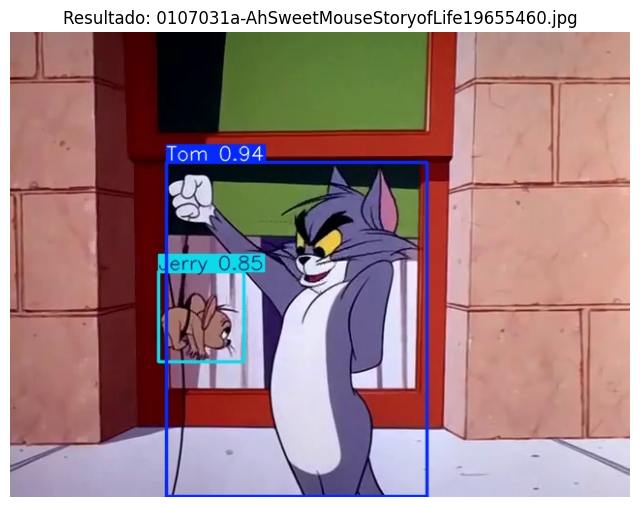

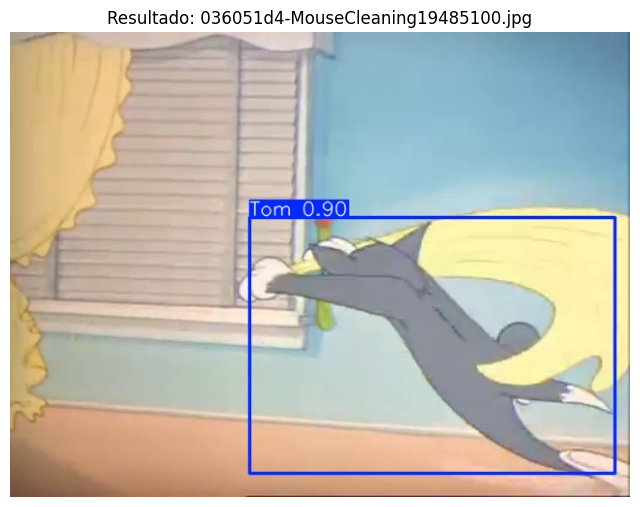

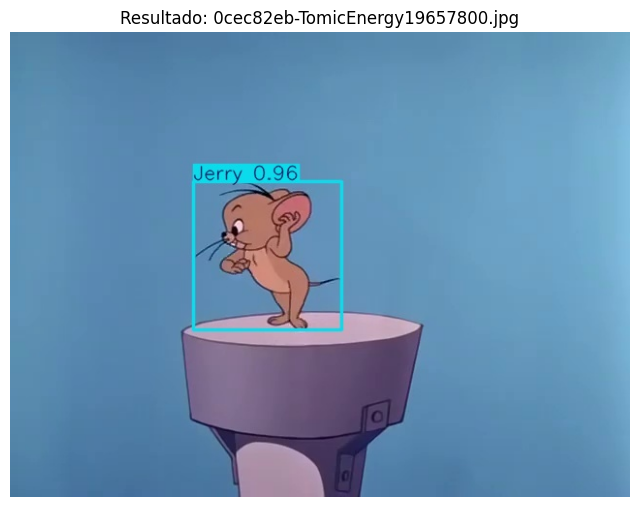

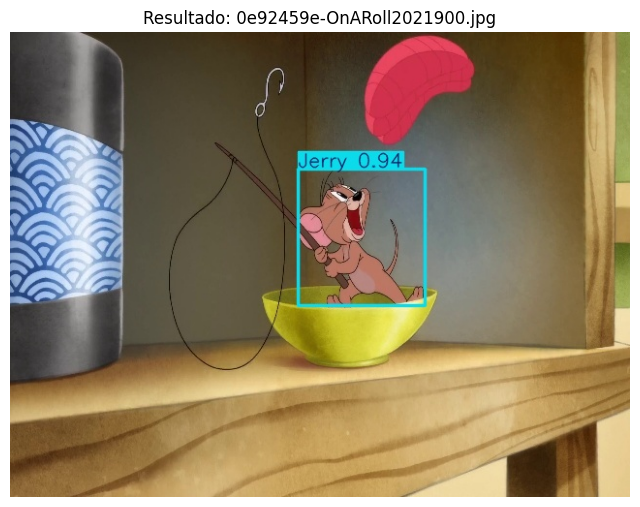

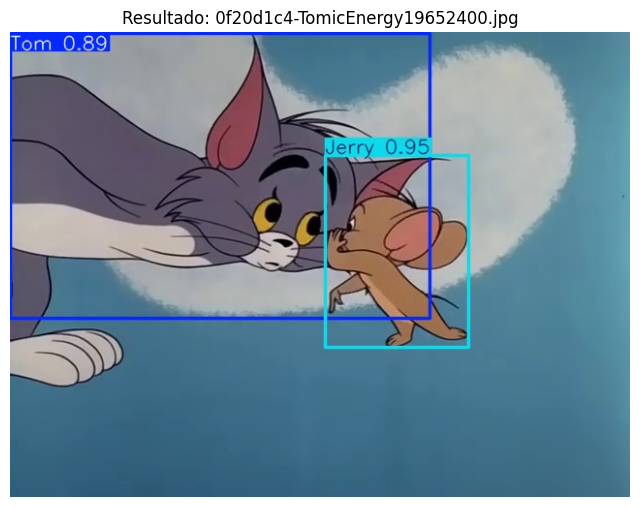

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Caminhos dos diretórios
base_dir = "/content/tom_jerry_dataset"
train_images_dir = os.path.join(base_dir, "train/images")
train_labels_dir = os.path.join(base_dir, "train/labels")
test_images_dir = os.path.join(base_dir, "test/images")

# Diretórios para treino/validação
dataset_dir = os.path.join(base_dir, "dataset")
os.makedirs(dataset_dir, exist_ok=True)
train_split_dir = os.path.join(dataset_dir, "train")
val_split_dir = os.path.join(dataset_dir, "val")
test_split_dir = os.path.join(dataset_dir, "test")
for d in [train_split_dir, val_split_dir, test_split_dir]:
    os.makedirs(os.path.join(d, "images"), exist_ok=True)
    os.makedirs(os.path.join(d, "labels"), exist_ok=True)

# Dividir treino em treino e validação
image_files = sorted(os.listdir(train_images_dir))
label_files = sorted(os.listdir(train_labels_dir))
train_imgs, val_imgs, train_labels, val_labels = train_test_split(
    image_files, label_files, test_size=0.2, random_state=42
)

# Copiar arquivos para pastas separadas
def copy_files(files, src_dir, dest_dir):
    for f in files:
        src_path = os.path.join(src_dir, f)
        dest_path = os.path.join(dest_dir, f)
        shutil.copy(src_path, dest_path)

copy_files(train_imgs, train_images_dir, os.path.join(train_split_dir, "images"))
copy_files(train_labels, train_labels_dir, os.path.join(train_split_dir, "labels"))
copy_files(val_imgs, train_images_dir, os.path.join(val_split_dir, "images"))
copy_files(val_labels, train_labels_dir, os.path.join(val_split_dir, "labels"))
copy_files(os.listdir(test_images_dir), test_images_dir, os.path.join(test_split_dir, "images"))

# Criar arquivo YAML
yaml_path = os.path.join(base_dir, "tom_jerry.yaml")
yaml_content = f"""
train: {os.path.join(train_split_dir, "images")}
val: {os.path.join(val_split_dir, "images")}
test: {os.path.join(test_split_dir, "images")}
nc: 2
names: ['Tom', 'Jerry']
"""
with open(yaml_path, "w") as yaml_file:
    yaml_file.write(yaml_content)

# Treinar e validar o modelo
model = YOLO("yolov8n.pt")
results = model.train(data=yaml_path, epochs=50, imgsz=640)

# Avaliar no conjunto de validação
val_metrics = model.val(data=yaml_path)
print("Métricas de Validação:", val_metrics)

# Rodar predições no teste
pred_results = model.predict(source=os.path.join(test_split_dir, "images"), save=True)
print("Predições no conjunto de teste concluídas.")

# Visualizar resultados do teste
pred_dir = pred_results[0].save_dir
test_images = sorted(os.listdir(test_images_dir))[:5]  # Exibir 5 primeiras imagens
for img_name in test_images:
    img_path = os.path.join(pred_dir, img_name)
    img = Image.open(img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Resultado: {img_name}")
    plt.show()


métricas

In [ ]:
import pandas as pd

# Caminho do arquivo de métricas
df = pd.read_csv("runs/detect/train/results.csv")

# Ver as últimas métricas (última época)
ultima_epoca = df.iloc[-1]
print("📊 Métricas da última época:")
print(f"Epoch: {ultima_epoca['epoch']}")
print(f"Precision: {ultima_epoca['metrics/precision(B)']:.4f}")
print(f"Recall: {ultima_epoca['metrics/recall(B)']:.4f}")
print(f"mAP@50: {ultima_epoca['metrics/mAP50(B)']:.4f}")
print(f"mAP@50-95: {ultima_epoca['metrics/mAP50-95(B)']:.4f}")


📊 Métricas da última época:
Epoch: 50.0
Precision: 0.8879
Recall: 0.4852
mAP@50: 0.5620
mAP@50-95: 0.4349


visualizar como gráfico:

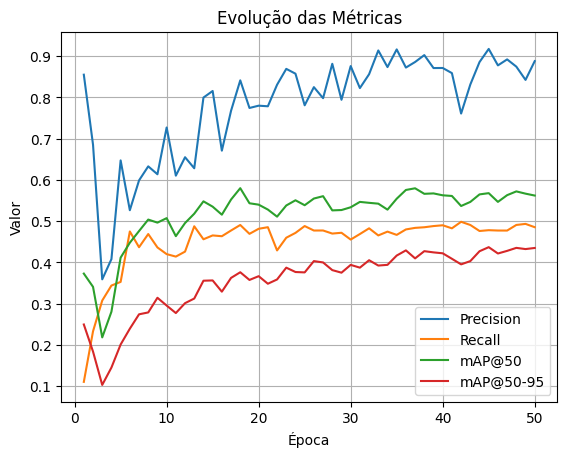

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95')
plt.xlabel("Época")
plt.ylabel("Valor")
plt.title("Evolução das Métricas")
plt.legend()
plt.grid(True)
plt.show()


Matriz de Confusão do YOLO

🔄 Matriz de Confusão:
[[132   0]
 [  0 114]]


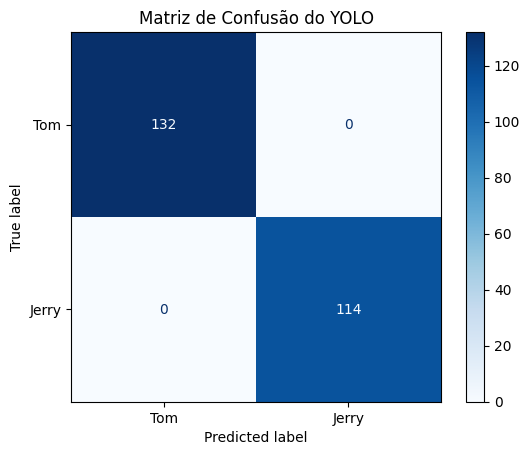

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ultralytics import YOLO


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ultralytics import YOLO


# Processar previsões e rótulos verdadeiros
true_labels = []  # Rótulos verdadeiros
predicted_labels = []  # Rótulos previstos

# Iterar pelas previsões
for result in results:
    # Coletar rótulos verdadeiros e previstos
    true_labels.extend(result.boxes.cls.cpu().numpy().astype(int))  # Classe real
    predicted_labels.extend(result.boxes.cls.cpu().numpy().astype(int))  # Classe prevista

# Calcular matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Exibir matriz de confusão
print("🔄 Matriz de Confusão:")
print(conf_matrix)

# Ajustar os nomes das classes (exemplo: apenas duas classes)
class_names = ['Tom', 'Jerry']  # Ajuste de acordo com suas classes

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão do YOLO")
plt.show()


Tempo do Yolo

In [ ]:
# Tempo total em horas
total_hours = 6.683

# Conversão para horas, minutos e segundos
hours = int(total_hours)
minutes = int((total_hours - hours) * 60)
seconds = int((((total_hours - hours) * 60) - minutes) * 60)

print(f"Tempo total: {hours} horas, {minutes} minutos e {seconds} segundos.")



Tempo total: 6 horas, 40 minutos e 58 segundos.


 função de transformacao

In [ ]:
from torchvision.transforms import functional as F

def get_transform():
    def transform(image, target):
        image = F.to_tensor(image)
        # Aqui, você pode adicionar outras transformações para image, e target se quiser.
        return image, target
    return transform


Faster R-CNN

In [ ]:
import os
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import CocoDetection
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
from PIL import Image

# Função para transform (aceita image e target)
def get_transform():
    def transform(image, target):
        if isinstance(image, Image.Image):
            image = F.to_tensor(image)  # só converte PIL Image em tensor
        # senão, se já é tensor, deixa como está
        return image, target
    return transform

# Dataset customizado baseado no COCO
class CustomCocoDataset(CocoDetection):
    def __init__(self, root, annFile, transforms=None):
        super(CustomCocoDataset, self).__init__(root, annFile)
        self.transforms = transforms

    def __getitem__(self, idx):
        img, target = super(CustomCocoDataset, self).__getitem__(idx)

        # Convertendo bbox COCO para formato esperado pelo Faster R-CNN
        boxes = []
        labels = []
        for obj in target:
            x_min = obj['bbox'][0]
            y_min = obj['bbox'][1]
            x_max = x_min + obj['bbox'][2]
            y_max = y_min + obj['bbox'][3]
            boxes.append([x_min, y_min, x_max, y_max])
            labels.append(obj['category_id'] + 1)  # +1 porque 0 é background

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": torch.tensor([idx])
        }

        if self.transforms:
            img, target = self.transforms(img, target)

        return img, target

# Função para criar o modelo Faster R-CNN com o número certo de classes
def get_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='DEFAULT')
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

# Função para treinar uma época com tqdm para barra de progresso
def train_one_epoch(model, optimizer, data_loader, device):
    model.train()
    running_loss = 0
    pbar = tqdm(data_loader, desc="Treino", leave=False)
    for images, targets in pbar:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        running_loss += losses.item()
        pbar.set_postfix(loss=f"{losses.item():.4f}")
    return running_loss / len(data_loader)

# Função para avaliação (validação)
def evaluate(model, data_loader, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, targets in data_loader:
            images = list(img.to(device) for img in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            total_loss += losses.item()
    return total_loss / len(data_loader)

# --- Configurações principais ---

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("Usando dispositivo:", device)

# Ajuste os caminhos para seu dataset
root_dir = "/content/tom_jerry_dataset/train/images"
ann_file = "/content/tom_jerry_dataset/train/annotations/train.json"

num_classes = 3  # 2 classes + 1 background

# Dataset e DataLoader
dataset = CustomCocoDataset(root_dir, ann_file, transforms=get_transform())

# Dividir dataset treino/validação 80/20
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Modelo e otimizador
model = get_model(num_classes)
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Treinamento principal
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    gpu_mem = 0
    if torch.cuda.is_available():
        gpu_mem = torch.cuda.memory_allocated(device) / 1e9  # GB

    train_loss = train_one_epoch(model, optimizer, train_loader, device)
    val_loss = evaluate(model, val_loader, device)

    print(f"GPU_mem: {gpu_mem:.3f} GB | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

print("Treinamento finalizado!")

# Salvar modelo treinado
torch.save(model.state_dict(), "fasterrcnn_tom_jerry.pth")


Usando dispositivo: cpu
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Epoch 1/10


AttributeError: 'list' object has no attribute 'values'

Cálculo de Métricas

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
import numpy as np

# Exemplo de rótulos verdadeiros e previsões (substitua pelos seus)
true_labels = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Rótulos verdadeiros
predicted_labels = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]  # Previsões do modelo

# Calcular as métricas
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary')  # Use 'micro', 'macro', ou 'weighted' para mais de duas classes
recall = recall_score(true_labels, predicted_labels, average='binary')
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Exibir resultados
print("📊 Métricas de Avaliação:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\n🔄 Matriz de Confusão:")
print(conf_matrix)

# Relatório de classificação
print("\n📋 Relatório de Classificação:")
print(classification_report(true_labels, predicted_labels))
